# <span style='color:brown'> Assignment 5 <span>

In [1]:
# Import necessary libraries
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

# Loading and Preprocessing

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Drop the species column (i.e., the labels)
# In the sklearn iris dataset, target is separate, so we simply ignore it
print("Iris dataset loaded and species column excluded.")

Iris dataset loaded and species column excluded.


In [3]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# KMeans Clustering

### KMeans clustering partitions data into k distinct, non-overlapping clusters based on feature similarity. It initializes 'k' centroids, assigns each point to the nearest centroid, and updates centroids until convergence.

### KMeans works well on structured datasets like Iris where natural groupings (e.g., species) are expected.

#### Applying the ELBOW Method to find the optimum number of clusters(k).

In [4]:
k_range= range(1,10)
sse=[]
for k in k_range :
    km=KMeans(n_clusters=k)
    km.fit(df[iris.feature_names])
    sse.append(km.inertia_)
sse   #SSE Values to diffrent k

[681.3706,
 152.34795176035792,
 78.85566582597731,
 57.25552380952381,
 46.44618205128205,
 39.03998724608725,
 35.07098807768807,
 33.86890066074277,
 31.725129728966685]

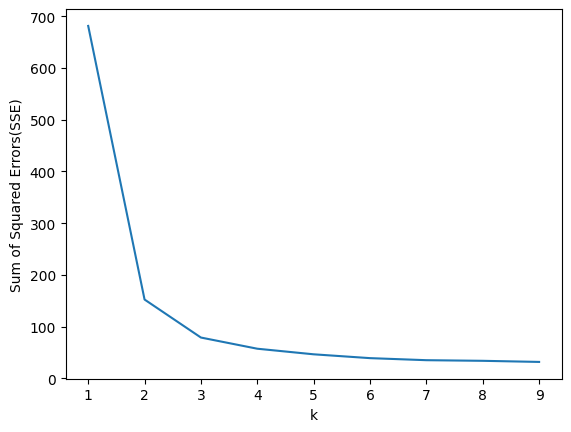

In [5]:
plt.xlabel("k")
plt.ylabel("Sum of Squared Errors(SSE)")
plt.plot(k_range,sse)
plt.show()

### Optimum no. of clusters (k) =3 from the elbow method.

## Apply KMeans

In [6]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(df[iris.feature_names])

In [7]:
df['kmeans_cluster']

0      1
1      1
2      1
3      1
4      1
      ..
145    0
146    2
147    0
148    0
149    2
Name: kmeans_cluster, Length: 150, dtype: int32

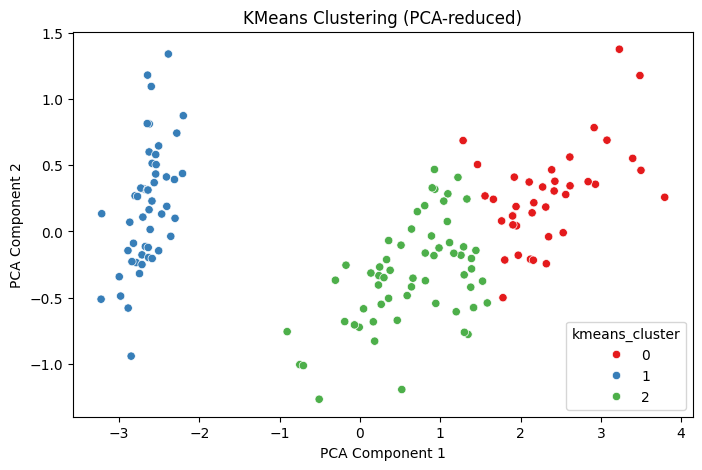

In [8]:
# Visualize with PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop('kmeans_cluster', axis=1))
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['kmeans_cluster'], palette='Set1')
plt.title("KMeans Clustering (PCA-reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# Hierarchial Clustering

### Hierarchical clustering builds a tree of clusters (dendrogram) either by agglomerating points bottom-up or dividing them top-down, based on distance metrics.

### It's useful when the number of clusters is not known in advance, and for understanding hierarchical relationships.

In [9]:
hierarchical = AgglomerativeClustering(n_clusters=3)
df['hierarchical_cluster'] = hierarchical.fit_predict(df.drop('kmeans_cluster', axis=1))

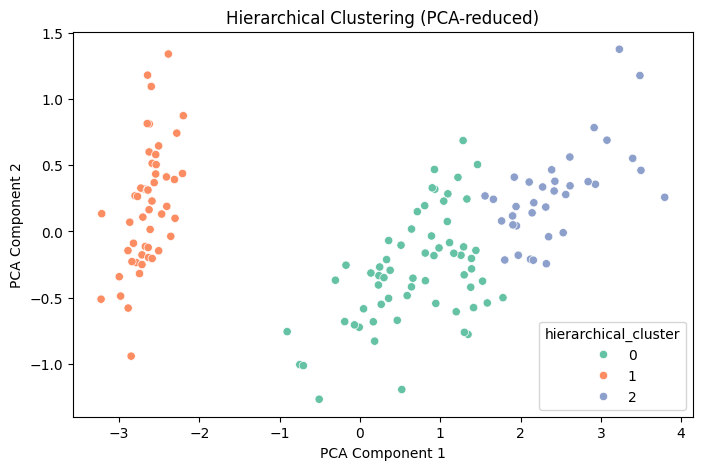

In [10]:
# Visualize clusters (PCA)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['hierarchical_cluster'], palette='Set2')
plt.title("Hierarchical Clustering (PCA-reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

## Dendrogram

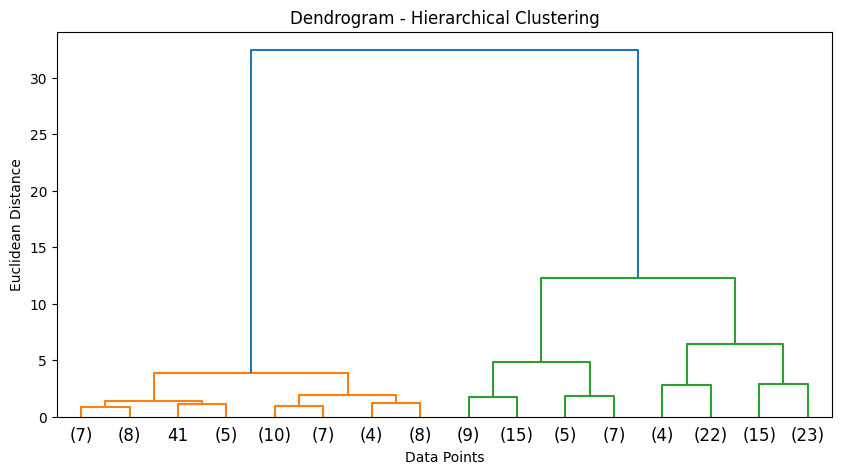

In [11]:
linked = linkage(df.drop(['kmeans_cluster', 'hierarchical_cluster'], axis=1), method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='level', p=3)
plt.title("Dendrogram - Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()